In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('precision', 3)

In [3]:
import pandas_datareader as web

In [4]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2012,12,30)

#msft = web.DataReader("MSFT", 'yahoo', start, end)
#aapl = web.DataReader("AAPL", 'yahoo', start, end)
# msft.to_csv("msft.csv")
# aapl.to_csv("aapl.csv")

In [3]:
msft = pd.read_csv("msft.csv", index_col=0, parse_dates=True)
aapl = pd.read_csv("aapl.csv", index_col=0, parse_dates=True)

In [6]:
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.96,26.39,26.55,26.77,6.473e+07,21.707
2012-01-04,27.47,26.78,26.82,27.40,8.052e+07,22.218
2012-01-05,27.73,27.29,27.38,27.68,5.608e+07,22.445
2012-01-06,28.19,27.53,27.53,28.11,9.946e+07,22.794
2012-01-09,28.10,27.72,28.05,27.74,5.971e+07,22.494


In [7]:
aapl.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732,14.607,14.621,14.687,3.022e+08,12.610
2012-01-04,14.810,14.617,14.643,14.766,2.600e+08,12.678
2012-01-05,14.948,14.738,14.820,14.930,2.713e+08,12.819
2012-01-06,15.098,14.972,14.992,15.086,3.183e+08,12.953
2012-01-09,15.277,15.048,15.196,15.062,3.940e+08,12.932


<AxesSubplot:xlabel='Date'>

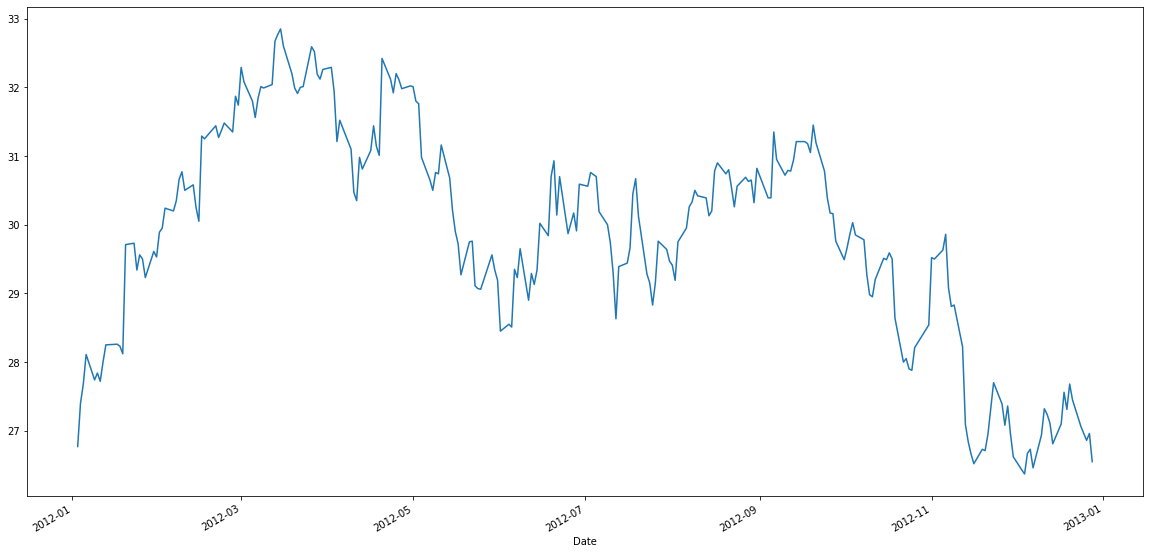

In [8]:
msft["Close"].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

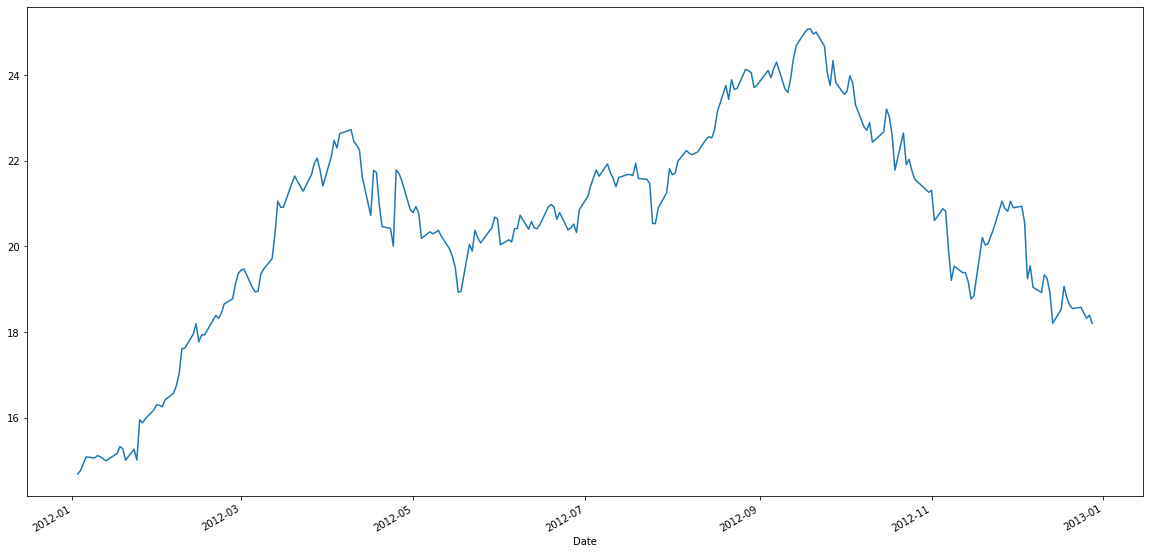

In [9]:
aapl["Close"].plot(figsize=(20,10))

-------------

# Concatenation

In [4]:
msftA01 = msft.loc['2012-01'][['Adj Close']]
msftA02 = msft.loc['2012-02'][['Adj Close']]
display(msftA01[:3], msftA02[:3])

,Adj Close
Date,
2012-01-03,21.707
2012-01-04,22.218
2012-01-05,22.445


,Adj Close
Date,
2012-02-01,24.237
2012-02-02,24.286
2012-02-03,24.521


In [5]:
pd.concat([msftA01.head(3), msftA02.head(3)])

,Adj Close
Date,
2012-01-03,21.707
2012-01-04,22.218
2012-01-05,22.445
2012-02-01,24.237
2012-02-02,24.286
2012-02-03,24.521


In [11]:
aaplA01 = aapl.loc['2012-01'][['Adj Close']]
withDups = pd.concat([msftA01.head(3), aaplA01.head(3)])
withDups

,Adj Close
Date,
2012-01-03,21.707
2012-01-04,22.218
2012-01-05,22.445
2012-01-03,12.610
2012-01-04,12.678
2012-01-05,12.819


Concatenating along the rows will result in having two (or however amount dataframes we are concatenating) entries for the same index

In [15]:
withDups.loc['2012-01-03']

,Adj Close
Date,
2012-01-03,21.707
2012-01-03,12.610


Instead, we would want to have two columns (one for each dataframe) per the same entry. That is concatenating by columns

In [25]:
twoCols = pd.concat([msftA01.head(3), aaplA01.head(3)], axis=1)
twoCols.columns= ["msft Adj Close", "aapl Adj Close"]
twoCols

,msft Adj Close,aapl Adj Close
Date,,
2012-01-03,21.707,12.610
2012-01-04,22.218,12.678
2012-01-05,22.445,12.819


We may alternatively, generate a *Multiindex*, which can help identify the source dataframe

In [29]:
closes = pd.concat([msftA01.head(3), aaplA01.head(3)], keys=["MSFT", "AAPL"])
closes

Adj Close
     Date                 
MSFT 2012-01-03     21.707
     2012-01-04     22.218
     2012-01-05     22.445
AAPL 2012-01-03     12.610
     2012-01-04     12.678
     2012-01-05     12.819

In [30]:
closes.index

MultiIndex([('MSFT', '2012-01-03'),
            ('MSFT', '2012-01-04'),
            ('MSFT', '2012-01-05'),
            ('AAPL', '2012-01-03'),
            ('AAPL', '2012-01-04'),
            ('AAPL', '2012-01-05')],
           names=[None, 'Date'])

In [31]:
closes.loc["MSFT"]

,Adj Close
Date,
2012-01-03,21.707
2012-01-04,22.218
2012-01-05,22.445


In [34]:
closes.iloc[1]

Adj Close    22.218
Name: (MSFT, 2012-01-04 00:00:00), dtype: float64

---------
Concatenating with multiple columns

In [36]:
msftAV, aaplAV = msft[['Adj Close', 'Volume']], msft[['Adj Close', 'Volume']]
pd.concat([msftAV, aaplAV])

,Adj Close,Volume
Date,,
2012-01-03,21.707,6.473e+07
2012-01-04,22.218,8.052e+07
2012-01-05,22.445,5.608e+07
2012-01-06,22.794,9.946e+07
2012-01-09,22.494,5.971e+07
...,...,...
2012-12-21,22.888,9.878e+07
2012-12-24,22.563,2.084e+07
2012-12-26,22.396,3.163e+07


There are duplicate rows in this resulting dataframe!

In [37]:
msftAV

,Adj Close,Volume
Date,,
2012-01-03,21.707,6.473e+07
2012-01-04,22.218,8.052e+07
2012-01-05,22.445,5.608e+07
2012-01-06,22.794,9.946e+07
2012-01-09,22.494,5.971e+07
...,...,...
2012-12-21,22.888,9.878e+07
2012-12-24,22.563,2.084e+07
2012-12-26,22.396,3.163e+07


In [38]:
aaplA = aapl[['Adj Close']]
pd.concat([msftAV, aaplA])

,Adj Close,Volume
Date,,
2012-01-03,21.707,6.473e+07
2012-01-04,22.218,8.052e+07
2012-01-05,22.445,5.608e+07
2012-01-06,22.794,9.946e+07
2012-01-09,22.494,5.971e+07
...,...,...
2012-12-21,16.067,NaN
2012-12-24,16.093,NaN
2012-12-26,15.871,NaN


In [39]:
pd.concat([msftAV, aaplA], join='inner')

,Adj Close
Date,
2012-01-03,21.707
2012-01-04,22.218
2012-01-05,22.445
2012-01-06,22.794
2012-01-09,22.494
...,...
2012-12-21,16.067
2012-12-24,16.093
2012-12-26,15.871


In [42]:
msftA = msft[['Adj Close']]
closes = pd.concat([msftA, aaplA], axis=1)
closes.head()

,Adj Close,Adj Close
Date,,
2012-01-03,21.707,12.610
2012-01-04,22.218,12.678
2012-01-05,22.445,12.819
2012-01-06,22.794,12.953
2012-01-09,22.494,12.932


In [44]:
pd.concat([msftAV.head(5), aaplAV.head(3)], axis=1)

,Adj Close,Volume,Adj Close,Volume
Date,,,,
2012-01-03,21.707,6.473e+07,21.707,6.473e+07
2012-01-04,22.218,8.052e+07,22.218,8.052e+07
2012-01-05,22.445,5.608e+07,22.445,5.608e+07
2012-01-06,22.794,9.946e+07,NaN,NaN
2012-01-09,22.494,5.971e+07,NaN,NaN


In [45]:
pd.concat([msftAV.head(5), aaplAV.head(3)], axis=1, keys=['MSFT', 'AAPL'])

MSFT                 AAPL           
           Adj Close     Volume Adj Close     Volume
Date                                                
2012-01-03    21.707  6.473e+07    21.707  6.473e+07
2012-01-04    22.218  8.052e+07    22.218  8.052e+07
2012-01-05    22.445  5.608e+07    22.445  5.608e+07
2012-01-06    22.794  9.946e+07       NaN        NaN
2012-01-09    22.494  5.971e+07       NaN        NaN

In [46]:
pd.concat([msftAV.head(5), aaplAV.head(3)], axis=1, keys=['MSFT', 'AAPL'], join='inner')

MSFT                 AAPL           
           Adj Close     Volume Adj Close     Volume
Date                                                
2012-01-03    21.707  6.473e+07    21.707  6.473e+07
2012-01-04    22.218  8.052e+07    22.218  8.052e+07
2012-01-05    22.445  5.608e+07    22.445  5.608e+07

In [49]:
pd.concat([msftAV.head(5), aaplAV.head(3)], axis=0, keys=['MSFT', 'AAPL'], ignore_index=True)

,Adj Close,Volume
0,21.707,6.473e+07
1,22.218,8.052e+07
2,22.445,5.608e+07
3,22.794,9.946e+07
4,22.494,5.971e+07
5,21.707,6.473e+07
6,22.218,8.052e+07
7,22.445,5.608e+07


---------
# Merging DataFrame Objects

In [52]:
msftAR = msftA.reset_index()
msftVR = msft[['Volume']].reset_index() 
display(msftAR.head(3), msftVR.head(3))

,Date,Adj Close
0,2012-01-03,21.707
1,2012-01-04,22.218
2,2012-01-05,22.445


,Date,Volume
0,2012-01-03,6.473e+07
1,2012-01-04,8.052e+07
2,2012-01-05,5.608e+07


The new "Date" column can be used as the basis for pd.merge() (this function chooses the columns with the same name in both dataFrames by default), which uses a column's information as a basis for joining two dataframes, instead of using the indexes in one of the axis

In [61]:
msftCVR = pd.merge(msftAR, msftVR, how='inner')
msftCVR.head(5)

,Date,Adj Close,Volume
0,2012-01-03,21.707,6.473e+07
1,2012-01-04,22.218,8.052e+07
2,2012-01-05,22.445,5.608e+07
3,2012-01-06,22.794,9.946e+07
4,2012-01-09,22.494,5.971e+07


----------
# Pivoting

In [113]:
# Prepare dataFrames procedurally

msft = pd.read_csv("msft.csv")
aapl = pd.read_csv("aapl.csv")

msft.insert(0, 'Symbol', 'MSFT')
aapl.insert(0, 'Symbol', 'AAPL')

msft = msft.set_index('Date')
aapl = aapl.set_index('Date')

# Verify the process
display(msft.head(3), aapl.head(3))

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2012-01-03,MSFT,26.96,26.39,26.55,26.77,6.473e+07,21.707
2012-01-04,MSFT,27.47,26.78,26.82,27.40,8.052e+07,22.218
2012-01-05,MSFT,27.73,27.29,27.38,27.68,5.608e+07,22.445


,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2012-01-03,AAPL,14.732,14.607,14.621,14.687,3.022e+08,12.610
2012-01-04,AAPL,14.810,14.617,14.643,14.766,2.600e+08,12.678
2012-01-05,AAPL,14.948,14.738,14.820,14.930,2.713e+08,12.819


If we concatenate this dataframes what results is not super useful 

In [117]:
combined = pd.concat([msft, aapl]).sort_index()
combined.head()

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2012-01-03,MSFT,26.960,26.390,26.550,26.770,6.473e+07,21.707
2012-01-03,AAPL,14.732,14.607,14.621,14.687,3.022e+08,12.610
2012-01-04,MSFT,27.470,26.780,26.820,27.400,8.052e+07,22.218
2012-01-04,AAPL,14.810,14.617,14.643,14.766,2.600e+08,12.678
2012-01-05,MSFT,27.730,27.290,27.380,27.680,5.608e+07,22.445


Suppose that what we want is a dataframe indexed by Date and with one "Adj Close" column for each of the categories in the "Symbol" column.
In this case we should use pd.pivot()

In [118]:
closes = combined.reset_index().pivot(index="Date", columns="Symbol", values="Adj Close")
closes.head()

Symbol,AAPL,MSFT
Date,,
2012-01-03,12.610,21.707
2012-01-04,12.678,22.218
2012-01-05,12.819,22.445
2012-01-06,12.953,22.794
2012-01-09,12.932,22.494


--------
# Stacking and Unstacking

If we have "pivoted" data on a dataframe, we can use pd.stack() to pivot columns into the index. The result is a *multiindex*

In [122]:
stackedCloses = closes.stack()
stackedCloses.to_frame()

0
Date       Symbol        
2012-01-03 AAPL    12.610
           MSFT    21.707
2012-01-04 AAPL    12.678
           MSFT    22.218
2012-01-05 AAPL    12.819
...                   ...
2012-12-26 MSFT    22.396
2012-12-27 AAPL    15.935
           MSFT    22.480
2012-12-28 AAPL    15.765
           MSFT    22.138

[498 rows x 1 columns]

While pd.unstack() pivots this level of the index into a column in the dataframe

In [123]:
unstackedCloses = stackedCloses.unstack()
unstackedCloses

Symbol,AAPL,MSFT
Date,,
2012-01-03,12.610,21.707
2012-01-04,12.678,22.218
2012-01-05,12.819,22.445
2012-01-06,12.953,22.794
2012-01-09,12.932,22.494
...,...,...
2012-12-21,16.067,22.888
2012-12-24,16.093,22.563
2012-12-26,15.871,22.396


In [126]:
combined.head()

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2012-01-03,MSFT,26.960,26.390,26.550,26.770,6.473e+07,21.707
2012-01-03,AAPL,14.732,14.607,14.621,14.687,3.022e+08,12.610
2012-01-04,MSFT,27.470,26.780,26.820,27.400,8.052e+07,22.218
2012-01-04,AAPL,14.810,14.617,14.643,14.766,2.600e+08,12.678
2012-01-05,MSFT,27.730,27.290,27.380,27.680,5.608e+07,22.445


---------
# Melting

Melting consist in transforming our dataframe into a format in which each row represent a unique id(s),variable combination

In [127]:
melted = pd.melt(combined.reset_index(), id_vars=['Date', 'Symbol'])
melted

,Date,Symbol,variable,value
0,2012-01-03,MSFT,High,26.960
1,2012-01-03,AAPL,High,14.732
2,2012-01-04,MSFT,High,27.470
3,2012-01-04,AAPL,High,14.810
4,2012-01-05,MSFT,High,27.730
...,...,...,...,...
2983,2012-12-26,MSFT,Adj Close,22.396
2984,2012-12-27,AAPL,Adj Close,15.935
2985,2012-12-27,MSFT,Adj Close,22.480
2986,2012-12-28,MSFT,Adj Close,22.138


Organizing data like this makes it simple to ask for very particular chunks of our data

In [128]:
melted[(melted.Date == '2012-01-03') & (melted.Symbol == 'MSFT')]

,Date,Symbol,variable,value
0,2012-01-03,MSFT,High,2.696e+01
498,2012-01-03,MSFT,Low,2.639e+01
996,2012-01-03,MSFT,Open,2.655e+01
1494,2012-01-03,MSFT,Close,2.677e+01
1992,2012-01-03,MSFT,Volume,6.473e+07
2490,2012-01-03,MSFT,Adj Close,2.171e+01


----------
# Grouping and aggregating

A common pattern is split-apply-aggregate where we first split our data into groups, then applying some statistical operations, before combining

In [140]:
s4g = combined[['Symbol', 'Adj Close']].reset_index()
s4g.insert(1, 'Year', pd.DatetimeIndex(s4g['Date']).year)
s4g.insert(2, 'Month', pd.DatetimeIndex(s4g['Date']).month)

s4g.head()

,Date,Year,Month,Symbol,Adj Close
0,2012-01-03,2012,1,MSFT,21.707
1,2012-01-03,2012,1,AAPL,12.610
2,2012-01-04,2012,1,MSFT,22.218
3,2012-01-04,2012,1,AAPL,12.678
4,2012-01-05,2012,1,MSFT,22.445


In [142]:
grouped = s4g.groupby('Symbol')
grouped

In [143]:
grouped.groups

{'AAPL': [1, 3, 5, 7, 9, 11, 13, 14, 16, 18, 20, 23, 25, 27, 29, 30, 33, 34, 37, 38, 41, 43, 44, 46, 49, 51, 52, 54, 57, 59, 61, 62, 64, 67, 68, 71, 72, 75, 77, 79, 81, 82, 84, 86, 89, 90, 93, 95, 96, 99, 100, 103, 105, 107, 109, 111, 112, 114, 117, 119, 121, 122, 124, 126, 128, 130, 132, 134, 137, 139, 140, 142, 145, 147, 149, 151, 153, 154, 156, 158, 160, 163, 164, 166, 168, 170, 173, 175, 176, 178, 180, 183, 184, 186, 189, 190, 193, 194, 196, 198, ...], 'MSFT': [0, 2, 4, 6, 8, 10, 12, 15, 17, 19, 21, 22, 24, 26, 28, 31, 32, 35, 36, 39, 40, 42, 45, 47, 48, 50, 53, 55, 56, 58, 60, 63, 65, 66, 69, 70, 73, 74, 76, 78, 80, 83, 85, 87, 88, 91, 92, 94, 97, 98, 101, 102, 104, 106, 108, 110, 113, 115, 116, 118, 120, 123, 125, 127, 129, 131, 133, 135, 136, 138, 141, 143, 144, 146, 148, 150, 152, 155, 157, 159, 161, 162, 165, 167, 169, 171, 172, 174, 177, 179, 181, 182, 185, 187, 188, 191, 192, 195, 197, 199, ...]}

In [144]:
def print_groups (groupobject) :
    for name, group in groupobject :
        print(name)
        print(group.head())

In [145]:
print_groups(grouped)

AAPL
         Date  Year  Month Symbol  Adj Close
1  2012-01-03  2012      1   AAPL     12.610
3  2012-01-04  2012      1   AAPL     12.678
5  2012-01-05  2012      1   AAPL     12.819
7  2012-01-06  2012      1   AAPL     12.953
9  2012-01-09  2012      1   AAPL     12.932
MSFT
         Date  Year  Month Symbol  Adj Close
0  2012-01-03  2012      1   MSFT     21.707
2  2012-01-04  2012      1   MSFT     22.218
4  2012-01-05  2012      1   MSFT     22.445
6  2012-01-06  2012      1   MSFT     22.794
8  2012-01-09  2012      1   MSFT     22.494


In [146]:
mcg = s4g.groupby(['Symbol', 'Year', 'Month'])
print_groups(mcg)

('AAPL', 2012, 1)
         Date  Year  Month Symbol  Adj Close
1  2012-01-03  2012      1   AAPL     12.610
3  2012-01-04  2012      1   AAPL     12.678
5  2012-01-05  2012      1   AAPL     12.819
7  2012-01-06  2012      1   AAPL     12.953
9  2012-01-09  2012      1   AAPL     12.932
('AAPL', 2012, 2)
          Date  Year  Month Symbol  Adj Close
41  2012-02-01  2012      2   AAPL     13.989
43  2012-02-02  2012      2   AAPL     13.956
44  2012-02-03  2012      2   AAPL     14.096
46  2012-02-06  2012      2   AAPL     14.228
49  2012-02-07  2012      2   AAPL     14.377
('AAPL', 2012, 3)
          Date  Year  Month Symbol  Adj Close
81  2012-03-01  2012      3   AAPL     16.696
82  2012-03-02  2012      3   AAPL     16.718
84  2012-03-05  2012      3   AAPL     16.349
86  2012-03-06  2012      3   AAPL     16.260
89  2012-03-07  2012      3   AAPL     16.274
('AAPL', 2012, 4)
           Date  Year  Month Symbol  Adj Close
124  2012-04-02  2012      4   AAPL     18.970
126  2012-04

In [148]:
mi = s4g.set_index(['Symbol', 'Year', 'Month'])
mi

Date  Adj Close
Symbol Year Month                       
MSFT   2012 1      2012-01-03     21.707
AAPL   2012 1      2012-01-03     12.610
MSFT   2012 1      2012-01-04     22.218
AAPL   2012 1      2012-01-04     12.678
MSFT   2012 1      2012-01-05     22.445
...                       ...        ...
            12     2012-12-26     22.396
AAPL   2012 12     2012-12-27     15.935
MSFT   2012 12     2012-12-27     22.480
            12     2012-12-28     22.138
AAPL   2012 12     2012-12-28     15.765

[498 rows x 2 columns]

In [150]:
mig_11 = mi.groupby(level=0)
print_groups(mig_11)

AAPL
                         Date  Adj Close
Symbol Year Month                       
AAPL   2012 1      2012-01-03     12.610
            1      2012-01-04     12.678
            1      2012-01-05     12.819
            1      2012-01-06     12.953
            1      2012-01-09     12.932
MSFT
                         Date  Adj Close
Symbol Year Month                       
MSFT   2012 1      2012-01-03     21.707
            1      2012-01-04     22.218
            1      2012-01-05     22.445
            1      2012-01-06     22.794
            1      2012-01-09     22.494


In [152]:
mig_12 = mi.groupby(level=2)
print_groups(mig_12)

1
                         Date  Adj Close
Symbol Year Month                       
MSFT   2012 1      2012-01-03     21.707
AAPL   2012 1      2012-01-03     12.610
MSFT   2012 1      2012-01-04     22.218
AAPL   2012 1      2012-01-04     12.678
MSFT   2012 1      2012-01-05     22.445
2
                         Date  Adj Close
Symbol Year Month                       
MSFT   2012 2      2012-02-01     24.237
AAPL   2012 2      2012-02-01     13.989
MSFT   2012 2      2012-02-02     24.286
AAPL   2012 2      2012-02-02     13.956
            2      2012-02-03     14.096
3
                         Date  Adj Close
Symbol Year Month                       
MSFT   2012 3      2012-03-01     26.356
AAPL   2012 3      2012-03-01     16.696
            3      2012-03-02     16.718
MSFT   2012 3      2012-03-02     26.185
AAPL   2012 3      2012-03-05     16.349
4
                         Date  Adj Close
Symbol Year Month                       
AAPL   2012 4      2012-04-02     18.970
MSFT   2

---------
# Aggregating 

In [153]:
mig_112 = mi.groupby(level=['Symbol', 'Year', 'Month'])
print_groups(mig_112)

('AAPL', 2012, 1)
                         Date  Adj Close
Symbol Year Month                       
AAPL   2012 1      2012-01-03     12.610
            1      2012-01-04     12.678
            1      2012-01-05     12.819
            1      2012-01-06     12.953
            1      2012-01-09     12.932
('AAPL', 2012, 2)
                         Date  Adj Close
Symbol Year Month                       
AAPL   2012 2      2012-02-01     13.989
            2      2012-02-02     13.956
            2      2012-02-03     14.096
            2      2012-02-06     14.228
            2      2012-02-07     14.377
('AAPL', 2012, 3)
                         Date  Adj Close
Symbol Year Month                       
AAPL   2012 3      2012-03-01     16.696
            3      2012-03-02     16.718
            3      2012-03-05     16.349
            3      2012-03-06     16.260
            3      2012-03-07     16.274
('AAPL', 2012, 4)
                         Date  Adj Close
Symbol Year Month         

In [154]:
mig_112.agg(np.mean)

Adj Close
Symbol Year Month           
AAPL   2012 1         13.142
            2         15.258
            3         17.709
            4         18.583
            5         17.316
            6         17.619
            7         18.432
            8         19.772
            9         20.990
            10        19.547
            11        17.444
            12        16.460
MSFT   2012 1         23.124
            2         25.087
            3         26.278
            4         25.716
            5         24.758
            6         24.385
            7         24.448
            8         25.042
            9         25.458
            10        24.038
            11        23.115
            12        22.496

In [155]:
s4g.groupby(['Symbol', 'Year', 'Month'],
            as_index=False).agg(np.mean)

,Symbol,Year,Month,Adj Close
0,AAPL,2012,1,13.142
1,AAPL,2012,2,15.258
2,AAPL,2012,3,17.709
3,AAPL,2012,4,18.583
4,AAPL,2012,5,17.316
5,AAPL,2012,6,17.619
6,AAPL,2012,7,18.432
7,AAPL,2012,8,19.772
8,AAPL,2012,9,20.990
9,AAPL,2012,10,19.547


In [156]:
mig_112.agg([np.mean, np.std])

Adj Close       
                       mean    std
Symbol Year Month                 
AAPL   2012 1        13.142  0.409
            2        15.258  0.812
            3        17.709  0.947
            4        18.583  0.697
            5        17.316  0.453
            6        17.619  0.230
            7        18.432  0.340
            8        19.772  0.753
            9        20.990  0.439
            10       19.547  0.653
            11       17.444  0.679
            12       16.460  0.633
MSFT   2012 1        23.124  0.741
            2        25.087  0.578
            3        26.278  0.277
            4        25.716  0.513
            5        24.758  0.696
            6        24.385  0.607
            7        24.448  0.515
            8        25.042  0.420
            9        25.458  0.383
            10       24.038  0.593
            11       23.115  0.890
            12       22.496  0.324